## 1c. Calculate <i>P<sup>v</sup></i><sub>sat</sub> for analyses in a csv file using user specified options

What if I don't want to use the default options...

## Setting things up
You need to install VolFe once on your machine, if you haven't yet. Then we need to import a few Python packages (including VolFe). 

In [2]:
# Install VolFe on your machine. Don't remove the # from this line!
# pip install VolFe # Remove the first # in this line if you have not installed VolFe on your machine before.

# import python packages
import pandas as pd
import matplotlib.pyplot as plt
import VolFe as vf

In that case, we create a dataframe telling VolFe what to use instead. There are lots of options that can be changed, which can be viewed below. 

In [3]:
help(vf.make_df_and_add_model_defaults)

Help on function make_df_and_add_model_defaults in module VolFe.model_dependent_variables:

make_df_and_add_model_defaults(models)
    Converts user-provided model configurations (e.g. ['carbon dioxide','MORB_Dixon95'],['hydrogen sulfide','basaltic andesite']
    into a structured pandas DataFrame, combined with default options for anything not specified
    
    
    Parameters
    ----------
    models : list of [str, str]
        A list of lists, where each inner list contains two elements: the model type (str)
        and the user-specified option (str) for that model type.
    
    Returns
    -------
    pandas.DataFrame
        A DataFrame where the first column is 'type', set as the index, and the second column
        is 'option', containing the user-specified option or the default option if none is provided.
        
    
    Model Parameters and Options
    ---------------------------------
    The following parameters can be overridden in models. 
    Any parameter can be s

Let's say I just want to use a different solubility constant for carbon dioxide and hydrogen sulfide and treat S2 as an ideal gas.

In [4]:
# choose the options I want - everything else will use the default options
my_models = [['carbon dioxide','Basalt_Dixon97'],['hydrogen sulfide','BasalticAndesite_Hughes24'],['y_S2','ideal']]

# turn to dataframe with correct column headers and indexes    
my_models = vf.make_df_and_add_model_defaults(my_models)

# show what the model dataframe looks like
print(my_models)

                            option
type                              
COH_species     yes_H2_CO_CH4_melt
H2S_m                         True
species X                       Ar
Hspeciation                   none
fO2                       Kress91A
...                            ...
error                          0.1
print status                 False
output csv                    True
setup                        False
high precision               False

[64 rows x 1 columns]


To start, we'll just compare a single analysis using the default options and these new options

In [5]:
my_analysis = {'Sample':'TN273-01D-01-01',
           'T_C': 1200., # Temperature in 'C
           'SiO2': 56.98, # wt%
           'TiO2': 1.66, # wt%
           'Al2O3': 15.52, # wt%
           'FeOT': 9.47, # wt%
           'MnO': 0.24, # wt%
           'MgO': 2.96, # wt%
           'CaO': 6.49, # wt%
           'Na2O': 4.06, # wt%
           'K2O': 0.38, # wt%
           'P2O5': 0.22, # wt%
           'H2O': 1.88, # wt%
           'CO2ppm': 13., # ppm
           'STppm': 362.83, # ppm
           'Xppm': 0., # ppm
           'Fe3FeT': 0.171} # mole or weight fraction (they're the same)

# Turn the dictionary into a pandas dataframe, setting the index to 0.
my_analysis = pd.DataFrame(my_analysis, index=[0])

In [6]:
vf.calc_Pvsat(my_analysis)

,sample,T_C,P_bar,SiO2_wtpc,TiO2_wtpc,Al2O3_wtpc,FeOT_wtpc,MnO_wtpc,MgO_wtpc,CaO_wtpc,...,KHOSg opt,KOSg opt,KOSg2 opt,KCOg opt,KCOHg opt,KOCSg opt,KCOs opt,carbonylsulfide opt,density opt,Date
0,TN273-01D-01-01,1200.0,337.809345,57.03956,1.661735,15.536223,9.479899,0.240251,2.963094,6.496784,...,Ohmoto97,Ohmoto97,ONeill22,Ohmoto97,Ohmoto97,Moussallam19,Holloway92,COS,DensityX,2024-09-16 20:04:59.037755


In [7]:
vf.calc_Pvsat(my_analysis,models=my_models)

,sample,T_C,P_bar,SiO2_wtpc,TiO2_wtpc,Al2O3_wtpc,FeOT_wtpc,MnO_wtpc,MgO_wtpc,CaO_wtpc,...,KHOSg opt,KOSg opt,KOSg2 opt,KCOg opt,KCOHg opt,KOCSg opt,KCOs opt,carbonylsulfide opt,density opt,Date
0,TN273-01D-01-01,1200.0,287.638259,57.03956,1.661735,15.536223,9.479899,0.240251,2.963094,6.496784,...,Ohmoto97,Ohmoto97,ONeill22,Ohmoto97,Ohmoto97,Moussallam19,Holloway92,COS,DensityX,2024-09-16 20:05:00.458956


We'll use the examples_marianas_wT csv in files again from Brounce et al. (2014, 2016) and Kelley & Cottrell (2012). To use the models you've chosen simply add "models=my_models" as a function argument. If you don't specify anything for "models" it simply uses the default options.

In [8]:
# Read csv to define melt composition
my_analyses = pd.read_csv("../files/example_marianas_wT.csv") 

# run the calculations
results1 = vf.calc_Pvsat(my_analyses,models=my_models)

For comparison, we'll also run using the default options.

In [9]:
# run the calculations 
results2 = vf.calc_Pvsat(my_analyses)

And we can plot the comparison below: default options in red, our options in blue.

(4500.0, 0.0)

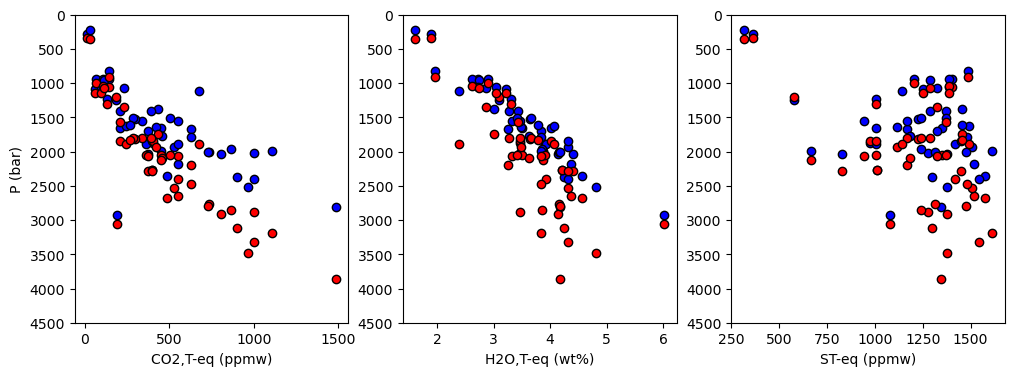

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))

# Plotting data

data1 = results1

ax1.plot(data1['CO2T-eq_ppmw'],
         data1['P_bar'], 'ok', mfc='blue')
ax2.plot(data1['H2OT-eq_wtpc'],
         data1['P_bar'], 'ok', mfc='blue')
ax3.plot(data1['ST_ppmw'],
         data1['P_bar'], 'ok', mfc='blue')

data1 = results2

ax1.plot(data1['CO2T-eq_ppmw'],
         data1['P_bar'], 'ok', mfc='red')
ax2.plot(data1['H2OT-eq_wtpc'],
         data1['P_bar'], 'ok', mfc='red')
ax3.plot(data1['ST_ppmw'],
         data1['P_bar'], 'ok', mfc='red')

ax1.set_xlabel('CO2,T-eq (ppmw)')
ax2.set_xlabel('H2O,T-eq (wt%)')
ax3.set_xlabel('ST-eq (ppmw)')
ax1.set_ylabel('P (bar)')
ax1.set_ylim([4500, 0])
ax2.set_ylim([4500, 0])
ax3.set_ylim([4500, 0])